In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dengue_labels = pd.read_csv('../../data/dengue_labels_train.csv')
dengue_features = pd.read_csv('../../data/dengue_features_train.csv')

merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [2]:
merged_df.info

<bound method DataFrame.info of      city  year  weekofyear  total_cases week_start_date   ndvi_ne   ndvi_nw  \
0      sj  1990          18            4      1990-04-30  0.122600  0.103725   
1      sj  1990          19            5      1990-05-07  0.169900  0.142175   
2      sj  1990          20            4      1990-05-14  0.032250  0.172967   
3      sj  1990          21            3      1990-05-21  0.128633  0.245067   
4      sj  1990          22            6      1990-05-28  0.196200  0.262200   
...   ...   ...         ...          ...             ...       ...       ...   
1451   iq  2010          21            5      2010-05-28  0.342750  0.318900   
1452   iq  2010          22            8      2010-06-04  0.160157  0.160371   
1453   iq  2010          23            1      2010-06-11  0.247057  0.146057   
1454   iq  2010          24            1      2010-06-18  0.333914  0.245771   
1455   iq  2010          25            4      2010-06-25  0.298186  0.232971   

       

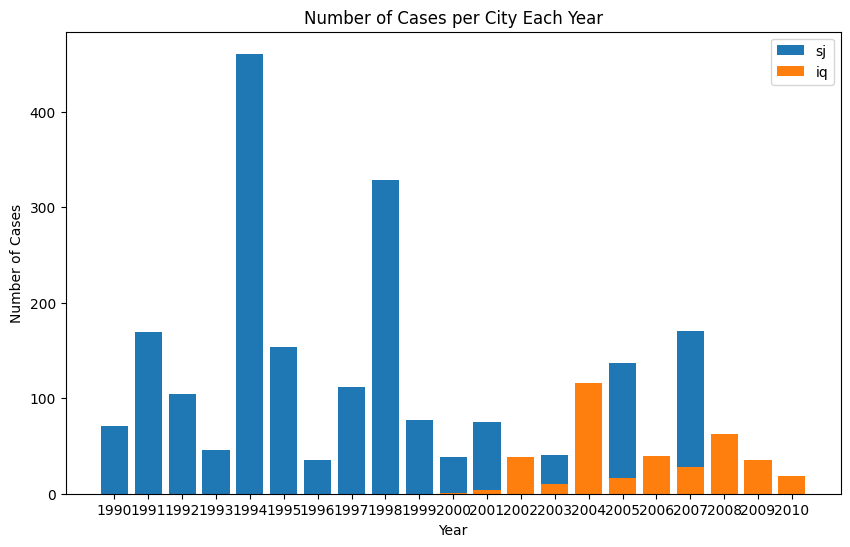

In [3]:
#Which city has the most cases per year

plt.figure(figsize=(10, 6))

# Loop through each city
for city in merged_df['city'].unique():
    city_data = merged_df[merged_df['city'] == city]
    plt.bar(city_data['year'], city_data['total_cases'], label=city)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per City Each Year')
plt.xticks(merged_df['year'].unique())  # Ensure all years are displayed
plt.legend()
plt.show()

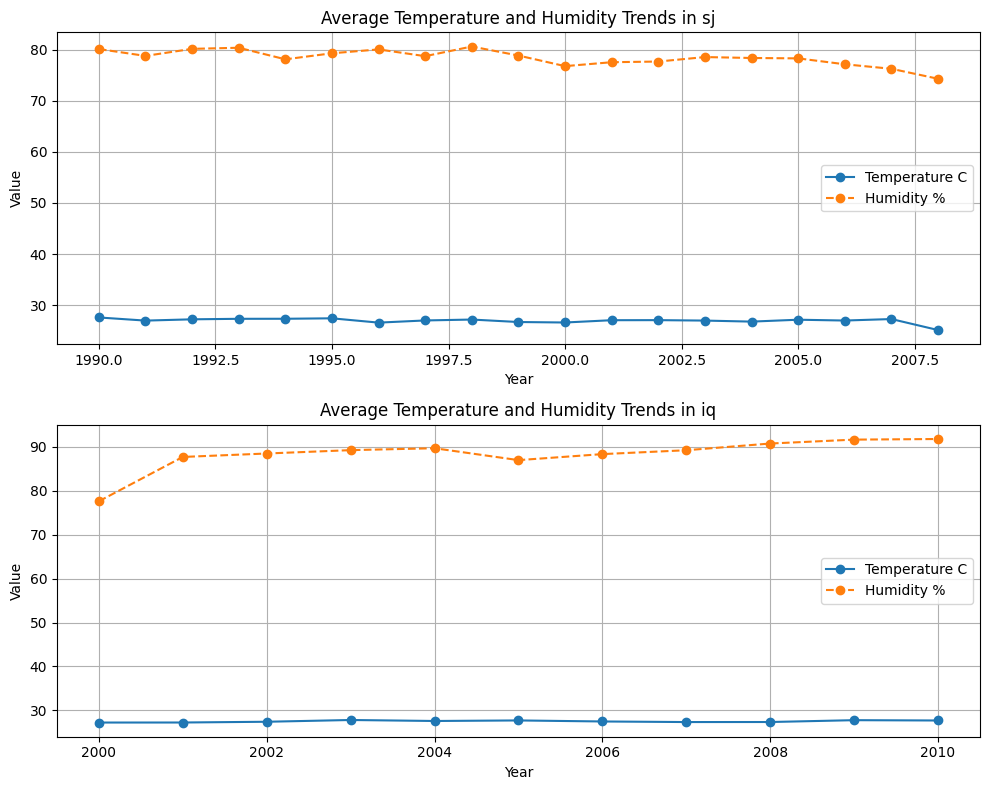

In [4]:
# Calculate average temperature and humidity for each year and city
average_data = merged_df.groupby(['city', 'year']).agg({'station_avg_temp_c': 'mean', 'reanalysis_relative_humidity_percent': 'mean'}).reset_index()

# Create a figure with two subplots (one for each city)
fig, axs = plt.subplots(2, figsize=(10, 8))

# Loop through each city
for i, city in enumerate(merged_df['city'].unique()):
    city_data = average_data[average_data['city'] == city]
    
    # Plot average temperature
    axs[i].plot(city_data['year'], city_data['station_avg_temp_c'], marker='o', label='Temperature C')
    
    # Plot average humidity
    axs[i].plot(city_data['year'], city_data['reanalysis_relative_humidity_percent'], marker='o', linestyle='--', label='Humidity %')
    
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Average Temperature and Humidity Trends in {city}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

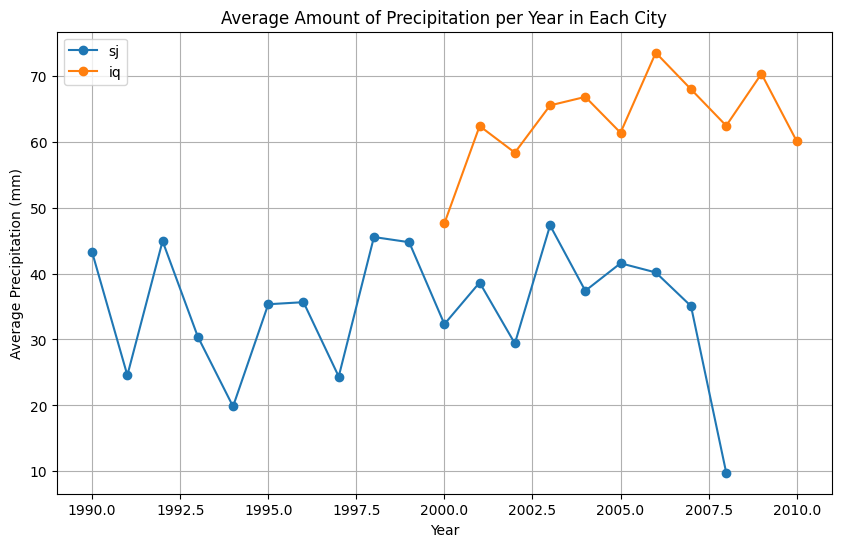

In [5]:
# Calculate average precipitation per year for each city
average_precipitation = merged_df.groupby(['year', 'city'])['precipitation_amt_mm'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each city
for city in average_precipitation['city'].unique():
    city_data = average_precipitation[average_precipitation['city'] == city]
    plt.plot(city_data['year'], city_data['precipitation_amt_mm'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Amount of Precipitation per Year in Each City')
plt.legend()
plt.grid(True)
plt.show()

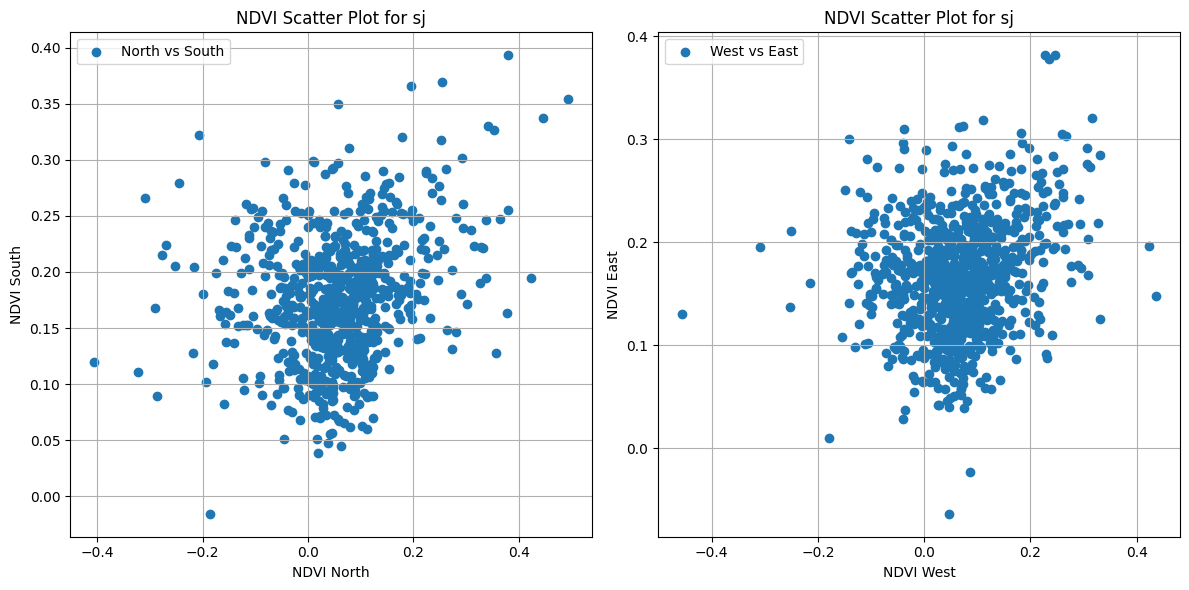

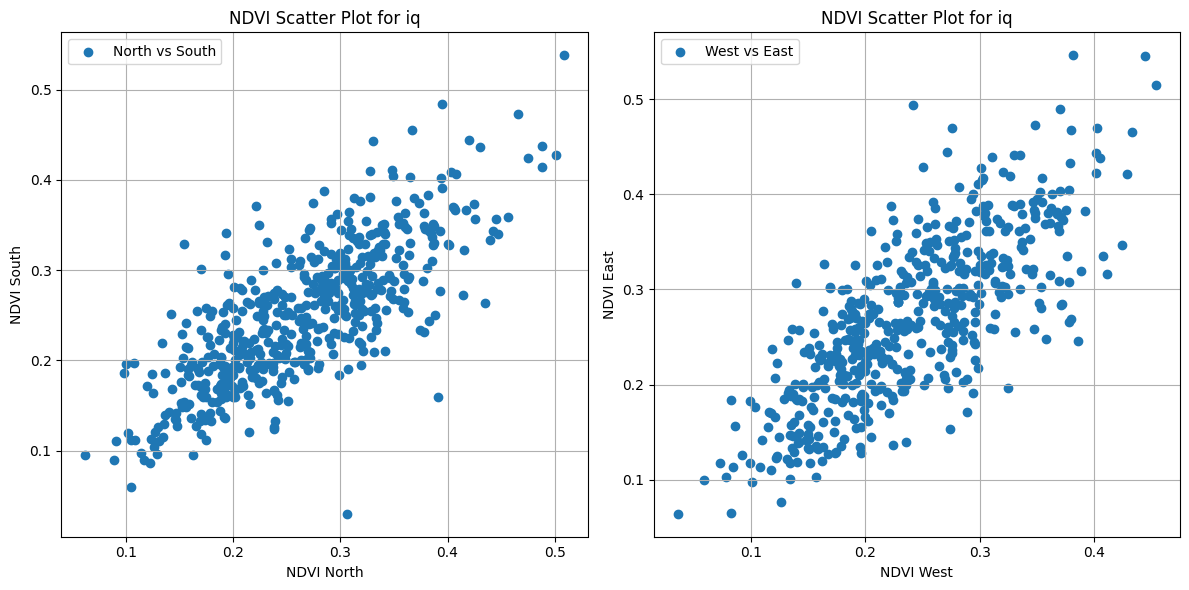

In [6]:
cities = merged_df['city'].unique()

# Plot scatter plots for each city
for city in cities:
    city_data = merged_df[merged_df['city'] == city]
    plt.figure(figsize=(12, 6))
    
    # Plot NDVI for north vs south
    plt.subplot(1, 2, 1)
    plt.scatter(city_data['ndvi_ne'], city_data['ndvi_se'], label='North vs South')
    plt.xlabel('NDVI North')
    plt.ylabel('NDVI South')
    plt.title(f'NDVI Scatter Plot for {city}')
    plt.legend()
    plt.grid(True)
    
    # Plot NDVI for west vs east
    plt.subplot(1, 2, 2)
    plt.scatter(city_data['ndvi_nw'], city_data['ndvi_sw'], label='West vs East')
    plt.xlabel('NDVI West')
    plt.ylabel('NDVI East')
    plt.title(f'NDVI Scatter Plot for {city}')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [7]:
#Nomralising
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm']

# Min-Max scaling
scaler_minmax = MinMaxScaler()
merged_df[columns_to_normalize] = scaler_minmax.fit_transform(merged_df[columns_to_normalize])

# Z-score normalization
scaler_standard = StandardScaler()
merged_df[columns_to_normalize] = scaler_standard.fit_transform(merged_df[columns_to_normalize])

print(merged_df.head())

  city  year  weekofyear  total_cases week_start_date   ndvi_ne   ndvi_nw  \
0   sj  1990          18            4      1990-04-30 -0.140192 -0.223645   
1   sj  1990          19            5      1990-05-07  0.196522  0.096889   
2   sj  1990          20            4      1990-05-14 -0.783365  0.353580   
3   sj  1990          21            3      1990-05-21 -0.097243  0.954632   
4   sj  1990          22            6      1990-05-28  0.383743  1.097461   

    ndvi_se   ndvi_sw  precipitation_amt_mm  ...  \
0 -0.071781 -0.294358             -0.762931  ...   
1 -0.561071 -0.558220             -0.524947  ...   
2 -0.630918 -0.375120             -0.256757  ...   
3  0.321991  0.400368             -0.695655  ...   
4  0.642209  0.536934             -0.875058  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571

In [10]:
# Separate features and target variable
merged_df = pd.get_dummies(merged_df, columns=['city'])

from sklearn.model_selection import train_test_split 

X = merged_df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'year', 'weekofyear', 
               'reanalysis_relative_humidity_percent', 'station_avg_temp_c', 'city_sj', 'city_iq']]
y = merged_df['total_cases']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train the XGBoost model
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importance analysis
feature_importance = model.feature_importances_
feature_names = X.columns
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name}: {importance}")

Mean Squared Error: 1282.0493794670283
ndvi_ne: 0.013600041158497334
ndvi_nw: 0.009277846664190292
ndvi_se: 0.24892626702785492
ndvi_sw: 0.020010031759738922
precipitation_amt_mm: 0.19323807954788208
year: 0.19108502566814423
weekofyear: 0.10470223426818848
reanalysis_relative_humidity_percent: 0.02708173543214798
station_avg_temp_c: 0.03853277117013931
city_sj: 0.15354600548744202
city_iq: 0.0
